In [100]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

values = dict()

for i in range(1,31):
  name = str(i)+'.jpg'
  img = cv2.imread(name)

  w,h,c = img.shape
  Z = img.reshape((w*h,3))

  # convert to np.float32
  Z = np.float32(Z)

  # define criteria, number of clusters(K) and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((img.shape))

  img_gray = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
  img_gray = np.invert(img_gray)
  kernel = np.ones((3,3),np.uint8)
  # for i in range(2):
  #   img_gray = cv2.dilate(img_gray, kernel)

  img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

  for i in range(5):
    img_gray = cv2.erode(img_gray, kernel)

  ret,thresh1 = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)
  # plt.imshow(thresh1,cmap='gray');plt.show()
  connectivity = 4

  output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)
  num_labels = output[0]-1
  values[name] = num_labels

In [101]:
values

{'1.jpg': 1,
 '2.jpg': 16,
 '3.jpg': 55,
 '4.jpg': 34,
 '5.jpg': 12,
 '6.jpg': 12,
 '7.jpg': 2,
 '8.jpg': 13,
 '9.jpg': 28,
 '10.jpg': 5,
 '11.jpg': 25,
 '12.jpg': 7,
 '13.jpg': 7,
 '14.jpg': 27,
 '15.jpg': 13,
 '16.jpg': 10,
 '17.jpg': 6,
 '18.jpg': 65,
 '19.jpg': 15,
 '20.jpg': 1,
 '21.jpg': 85,
 '22.jpg': 2,
 '23.jpg': 16,
 '24.jpg': 1,
 '25.jpg': 29,
 '26.jpg': 15,
 '27.jpg': 8,
 '28.jpg': 15,
 '29.jpg': 581,
 '30.jpg': 9}

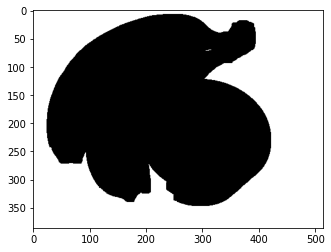

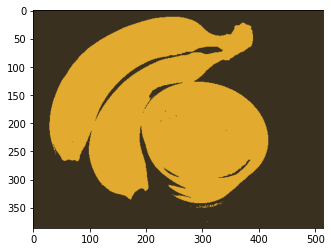

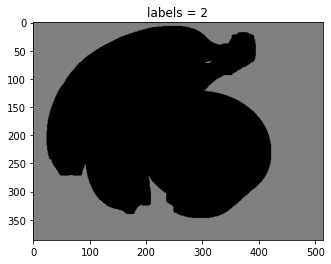

[[    24      7    398    340 100147]
 [     0      0    514    386  98246]
 [   306     70     10      2     11]]


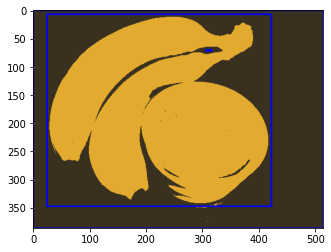

In [98]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('22.jpg')

w,h,c = img.shape
Z = img.reshape((w*h,3))
# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))


img_gray = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
img_gray = np.invert(img_gray)
kernel = np.ones((3,3),np.uint8)
# for i in range(2):
#   img_gray = cv2.dilate(img_gray, kernel)

img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

for i in range(5):
  img_gray = cv2.erode(img_gray, kernel)

ret,thresh1 = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh1,cmap='gray');plt.show()
connectivity = 4

output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)
num_labels = output[0]-1
label = 'labels = '+str(num_labels)
plt.imshow(res2[:,:,::-1]);plt.show()
plt.imshow(output[1],cmap='gray'),plt.title(label);plt.show()
print(output[2])
color = (255, 0, 0)
for i in output[2]:
  cv2.rectangle(res2, (i[0], i[1]), (i[0] + i[2], i[1] + i[3]), color, 2)
plt.imshow(res2[:,:,::-1]);plt.show()

In [90]:
%pwd

'/content'

In [92]:
import glob
files = glob.glob('./*')

In [93]:
print(files)

['./24.jpg', './17.jpg', './5.jpg', './10.jpg', './21.jpg', './16.jpg', './11.jpg', './8.jpg', './23.jpg', './6.jpg', './9.jpg', './1.jpg', './30.jpg', './28.jpg', './4.jpg', './25.jpg', './14.jpg', './22.jpg', './27.jpg', './7.jpg', './18.jpg', './26.jpg', './12.jpg', './2.jpg', './20.jpg', './29.jpg', './15.jpg', './13.jpg', './19.jpg', './3.jpg', './sample_data']
